In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('emissions_medium_granularity.csv')
print(df.head())
df_parent = df.groupby(['year','parent_type'], as_index=False)['total_emissions_MtCO2e'].sum()

    year                   parent_entity         parent_type    commodity  \
0   1962  Abu Dhabi National Oil Company  State-owned Entity    Oil & NGL   
1   1962  Abu Dhabi National Oil Company  State-owned Entity  Natural Gas   
2   1963  Abu Dhabi National Oil Company  State-owned Entity    Oil & NGL   
3   1963  Abu Dhabi National Oil Company  State-owned Entity  Natural Gas   
4   1964  Abu Dhabi National Oil Company  State-owned Entity    Oil & NGL   
5   1964  Abu Dhabi National Oil Company  State-owned Entity  Natural Gas   
6   1965  Abu Dhabi National Oil Company  State-owned Entity    Oil & NGL   
7   1965  Abu Dhabi National Oil Company  State-owned Entity  Natural Gas   
8   1966  Abu Dhabi National Oil Company  State-owned Entity    Oil & NGL   
9   1966  Abu Dhabi National Oil Company  State-owned Entity  Natural Gas   
10  1967  Abu Dhabi National Oil Company  State-owned Entity    Oil & NGL   
11  1967  Abu Dhabi National Oil Company  State-owned Entity  Natural Gas   

In [2]:
# Create a pivot table to reshape the data for stacked area chart
pivot_df = df_parent.pivot(index = 'year',columns='parent_type', values='total_emissions_MtCO2e')
pivot_df.dropna(inplace=True)
pivot_df
pivot_df_100 = pivot_df.divide(pivot_df.sum(axis=1), axis=0)
pivot_df_100

parent_type,Investor-owned Company,Nation State,State-owned Entity
year,,,
1928,0.610762,0.385184,0.004055
1929,0.613043,0.383099,0.003858
1930,0.614136,0.381919,0.003946
1931,0.558927,0.437311,0.003762
1932,0.506316,0.489918,0.003766
...,...,...,...
2018,0.254574,0.359673,0.385753
2019,0.252218,0.365065,0.382717
2020,0.241416,0.382161,0.376423


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from highlight_text import ax_text, fig_text

# animation
from PIL import Image, ImageSequence
import textwrap
import math
import networkx as nx
from matplotlib.animation import FuncAnimation, PillowWriter

df = pd.read_csv('emissions_medium_granularity.csv')
df.head(30)
df_parent = df.groupby(['year','parent_type'], as_index=False)['total_emissions_MtCO2e'].sum()

# pivot data
pivot_df = df_parent.pivot(index = 'year',columns='parent_type', values='total_emissions_MtCO2e')
pivot_df.dropna(inplace=True)
pivot_df
pivot_df_reference = pivot_df.copy()
print(pivot_df_reference)
# interpolate for more data points
multiple = 5
new_index = np.linspace(pivot_df.index.min(), pivot_df.index.max(), len(pivot_df) * multiple-(multiple-1))
pivot_df = pivot_df.reindex(new_index).interpolate(method='linear')
pivot_df.reset_index(inplace=True)
pivot_df.rename(columns={'index': 'year'}, inplace=True)
pivot_df['year'] = pivot_df['year'].astype(int)
pivot_df.index = pivot_df['year']
pivot_df.drop(columns='year', inplace=True)
pivot_df.index = new_index

# higher interpolate level after 2018
pivot_df_before = pivot_df.loc[:2018]
pivot_df_after = pivot_df.loc[2018:]
multiple_end = 15
new_index_end = np.linspace(pivot_df_after.index.min(), pivot_df_after.index.max(), len(pivot_df_after) * multiple_end-(multiple_end-1))
pivot_df_after = pivot_df_after.reindex(new_index_end).interpolate(method='linear')
pivot_df_after.reset_index(inplace=True)
pivot_df_after.rename(columns={'index': 'year'}, inplace=True)
pivot_df_after['year'] = pivot_df_after['year'].astype(int)
pivot_df_after.index = pivot_df_after['year']
pivot_df_after.drop(columns='year', inplace=True)
pivot_df_after.index = new_index_end

# combine data
pivot_df = pd.concat([pivot_df_before, pivot_df_after])
pivot_df.drop_duplicates(inplace=True)
pivot_df.tail()

parent_type  Investor-owned Company  Nation State  State-owned Entity
year                                                                 
1928                     239.797981    151.231222            1.591892
1929                     257.664085    161.017583            1.621591
1930                     274.580636    170.756277            1.764149
1931                     252.828157    197.815806            1.701780
1932                     257.553961    249.212344            1.915616
...                             ...           ...                 ...
2018                    9096.399550  12851.803271        13783.679146
2019                    9180.150960  13287.499196        13929.994434
2020                    8431.728343  13347.410852        13146.995803
2021                    8633.479718  14067.834722        13424.276064
2022                    8592.433787  15101.668181        13865.102301

[95 rows x 3 columns]


parent_type,Investor-owned Company,Nation State,State-owned Entity
2021.946667,8594.622903,15046.530397,13841.591568
2021.960000,8594.075624,15060.314843,13847.469251
2021.973333,8593.528345,15074.099289,13853.346934
2021.986667,8592.981066,15087.883735,13859.224617
2022.000000,8592.433787,15101.668181,13865.102301


In [6]:
new_index

array([1928. , 1928.2, 1928.4, 1928.6, 1928.8, 1929. , 1929.2, 1929.4,
       1929.6, 1929.8, 1930. , 1930.2, 1930.4, 1930.6, 1930.8, 1931. ,
       1931.2, 1931.4, 1931.6, 1931.8, 1932. , 1932.2, 1932.4, 1932.6,
       1932.8, 1933. , 1933.2, 1933.4, 1933.6, 1933.8, 1934. , 1934.2,
       1934.4, 1934.6, 1934.8, 1935. , 1935.2, 1935.4, 1935.6, 1935.8,
       1936. , 1936.2, 1936.4, 1936.6, 1936.8, 1937. , 1937.2, 1937.4,
       1937.6, 1937.8, 1938. , 1938.2, 1938.4, 1938.6, 1938.8, 1939. ,
       1939.2, 1939.4, 1939.6, 1939.8, 1940. , 1940.2, 1940.4, 1940.6,
       1940.8, 1941. , 1941.2, 1941.4, 1941.6, 1941.8, 1942. , 1942.2,
       1942.4, 1942.6, 1942.8, 1943. , 1943.2, 1943.4, 1943.6, 1943.8,
       1944. , 1944.2, 1944.4, 1944.6, 1944.8, 1945. , 1945.2, 1945.4,
       1945.6, 1945.8, 1946. , 1946.2, 1946.4, 1946.6, 1946.8, 1947. ,
       1947.2, 1947.4, 1947.6, 1947.8, 1948. , 1948.2, 1948.4, 1948.6,
       1948.8, 1949. , 1949.2, 1949.4, 1949.6, 1949.8, 1950. , 1950.2,
      

MovieWriter imagemagick unavailable; using Pillow instead.


1416842.6625458288
30.904296227596756
36.30279969320774
32.7929040791955
Original animation finished
Final animation finished!


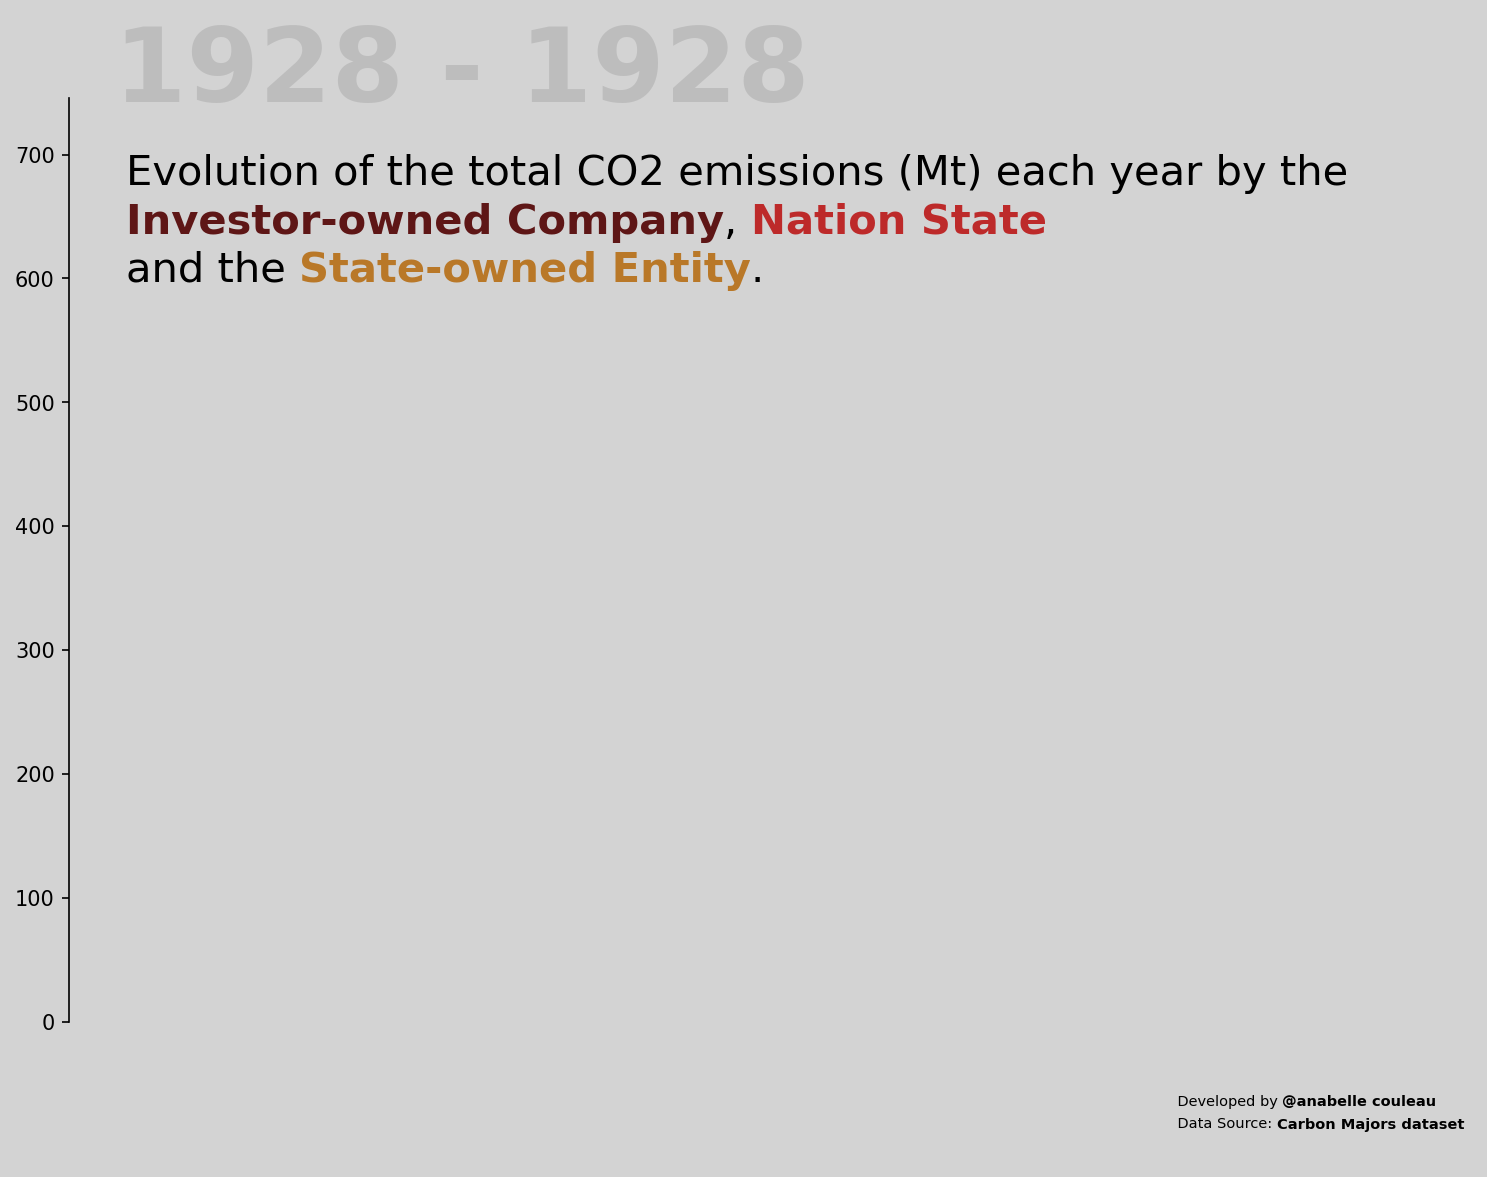

In [29]:
# parameters
delay_years = 1
initial_duration = 50
highlight_duration = initial_duration
colors = ['#b97828', '#bd2a2a','#5e1616']
background_color = '#D3D3D3'

# reference values
total = pivot_df_reference.sum().sum()
inv_share = pivot_df_reference.loc[:,'Investor-owned Company'].sum()/total*100
nat_share = pivot_df_reference.loc[:,'Nation State'].sum()/total*100
soe_share = 100 - inv_share - nat_share

print(total)
print(inv_share)
print(nat_share)
print(soe_share)
# increase resolution
dpi = 150
plt.rcParams['figure.dpi'] = dpi
plt.rcParams['savefig.dpi'] = dpi

# Figure and axis
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_facecolor(background_color)
ax.set_facecolor(background_color)

# dates to highlight
start_date = 1928
end_date = 2022

end_wii = 1945
second_oil_shock = 1979
dissolution_soviet = 1992
paris_agreement = 2015
covid = 2020
total_today = 2022
dates_highlight = [
    end_wii + delay_years,
    second_oil_shock + delay_years,
    dissolution_soviet + delay_years,
    paris_agreement + delay_years,
    covid + delay_years,
]
event_end_dates = dates_highlight[1:] + [end_date + delay_years]
adjustements = [
    (0, 0),
    (0, 10),
    (2, 5),
    (0, 20),
    (-18, 0),
    (-22, -400),
]
event_texts = [
    f'End of World War II\n<{end_wii}>',
    f'Second Oil Shock\n<{second_oil_shock}>',
    f'Dissolution of Soviet Union\n<{dissolution_soviet}>',
    f'Paris Agreement\n<{paris_agreement}>',
    f'Covid Pandemic\n<{covid}>',
]

# description
description = f"""
Between {start_date} and {end_date}, 122 of the world's largest producers generated a total of {round(total,0)} MtCO2 emissions. 
Over the last twenty years, carbon emissions from nation-states have surpassed those from state-owned entities and private companies.\n
"""

def annot_event(current_date, event_start_date, event_end_date, adj, text):
    if event_start_date <= current_date <= event_end_date:
        sub_subset = pivot_df.loc[event_start_date]
        total_thisyear = sub_subset['Investor-owned Company'] + sub_subset['Nation State']+ sub_subset['State-owned Entity']

        ax.plot((event_start_date, event_start_date), (0, total_thisyear), color='black', zorder=10)
        ax.scatter(event_start_date, total_thisyear, color='black', s=100, zorder=10)
        ax_text(
            event_start_date - 2 + adj[0], total_thisyear*1.2 + adj[1],
            text,
            fontsize=14,
            color='black',
            ha='left', va='center',
            highlight_textprops=[
                {'fontweight':'bold'}
            ],
            ax=ax
        )
        




def update(frame):
    ax.clear()
    subset_df = pivot_df.iloc[:frame]
    ax.stackplot(
        subset_df.index, subset_df.values.T,
        colors=colors
    )
    
    # test if last 5 frames
    factor_y_axis = 1.9
    y_max = pivot_df.iloc[:frame+1].sum(axis=1).max()*factor_y_axis
    ax.set_ylim(0, y_max)
    ax.set_xticks([])
    ax.spines[['top', 'right', 'bottom']].set_visible(False)

    # year annotation in background
    year = pivot_df.index[frame]
    fig_text(
        0.15, 0.9,
        '1928 - ' + str(round(year)),
        ha='left', va='center',
        fontsize=50,
        fontweight='bold',
        alpha=0.1,
        fig=fig
    )

    # description of video
    text = """
    Evolution of the total CO2 emissions (Mt) each year by the 
    <Investor-owned Company>, <Nation State> 
    and the <State-owned Entity>.
    """
    fig_text(
        0.127, 0.84,
        text,
        ha='left', va='top',
        fontsize=20,
        color='black',
        highlight_textprops=[
                {'color':colors[2],
                'fontweight':'bold'},
                {'color':colors[1],
                'fontweight':'bold'},
                {'color':colors[0],
                'fontweight':'bold'},
        ],
        fig=fig
    )

    total_chars = len(description)
    effective_frame_count = len(pivot_df) - 20
    num_chars = math.ceil(total_chars * (frame / effective_frame_count)) if frame < effective_frame_count else total_chars
    current_description = description[:num_chars]
    wrapped_text = '\n'.join([textwrap.fill(paragraph, width=70) for paragraph in current_description.split('\n')])
    
    fig_text(
        0.157, 0.72,
        wrapped_text,
        ha='left', va='top',
        fontsize=14,
        color='black',
        fig=fig
    )

    last_frame = len(pivot_df) - 1

    # credit annotation
    text = """
    Developed by <@anabelle couleau>
    Data Source: <Carbon Majors dataset>
    """
    fig_text(
        0.9, 0,
        text,
        ha='right', va='bottom',
        fontsize=7,
        color='black',
        highlight_textprops=[
            {'fontweight':'bold'},
            {'fontweight':'bold'},
        ],
        fig=fig
    )

    return ax


# Creating the animation
ani = FuncAnimation(
    fig=fig,
    func=update,
    frames=len(pivot_df),
    interval=5 # in ms
)
ani.save('animation.gif', writer='imagemagick', fps=20)
print('Original animation finished')


# get initial frames
with Image.open('animation.gif') as img:
    frames = [frame.copy() for frame in ImageSequence.Iterator(img)]

# set duration of each frame
for i, frame in enumerate(frames):
    frame_duration = initial_duration

    # highlight dates
    if pivot_df.index[i] in dates_highlight:
        frame_duration = highlight_duration

    # make last 12 frames becomes step by step slower
    if i > len(frames) - 12:
        frame_duration = initial_duration + (i - len(frames) + 12) * 50

    # stay for last date
    if i == len(frames) - 1:
        frame_duration = 10000
    frame.info['duration'] = frame_duration

# Save the modified frames as a new GIF
frames[0].save('modified_animation.gif', save_all=True, append_images=frames[1:], loop=0)
print('Final animation finished!')


def time_of_gif(gif_path):
    with Image.open(gif_path) as img:
        duration = 0
        for frame in ImageSequence.Iterator(img):
            duration += frame.info['duration']
    print(f'Time of the GIF: {duration/1000} seconds')

time_of_gif('modified_animation.gif')
        